# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [30]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=nanortalik
Processing Record 2 | Inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=inirida
Processing Record 3 | Diamantino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=diamantino
Processing Record 4 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=saint george
Processing Record 5 | Nadvoitsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=nadvoitsy
Processing Record 6 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=launceston
Processing Record 7 | Dunedin
http://

Processing Record 56 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=dingle
Processing Record 57 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=namatanai
Processing Record 58 | Ginir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=ginir
Processing Record 59 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=tuktoyaktuk
Processing Record 60 | Mitzic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=mitzic
Processing Record 61 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=bredasdorp
Processing Record 62 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=emba
Pr

Processing Record 111 | Aksarayskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=aksarayskiy
Processing Record 112 | Mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=mnogovershinnyy
Processing Record 113 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=bethel
Processing Record 114 | Tsumeb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=tsumeb
Processing Record 115 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=san cristobal
Processing Record 116 | Smiltene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=smiltene
Processing Record 117 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf

Processing Record 167 | ChengDe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=chengde
Processing Record 168 | Mananjary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=mananjary
Processing Record 169 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=bonthe
Processing Record 170 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=haines junction
Processing Record 171 | Pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=pacifica
Processing Record 172 | Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=lasa
Processing Record 173 | Junin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e36801

City not found. Skipping...
Processing Record 222 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=antofagasta
Processing Record 223 | Roros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=roros
Processing Record 224 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=narsaq
Processing Record 225 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=santa maria
Processing Record 226 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=khatanga
Processing Record 227 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=tiksi
Processing Record 228 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506

City not found. Skipping...
Processing Record 277 | Castellana Grotte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=castellana grotte
City not found. Skipping...
City not found. Skipping...
Processing Record 278 | Samagaltay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=samagaltay
Processing Record 279 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=brae
Processing Record 280 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=quatre cocos
Processing Record 281 | Xocali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=xocali
Processing Record 282 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=prince rupert
Processing Record 

Processing Record 333 | Damietta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=damietta
Processing Record 334 | Vitim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=vitim
City not found. Skipping...
Processing Record 335 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=port augusta
Processing Record 336 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=kulhudhuffushi
Processing Record 337 | Tokur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=tokur
Processing Record 338 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=cidreira
Processing Record 339 | Thio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 389 | Tecoanapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=tecoanapa
Processing Record 390 | Gilgit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=gilgit
Processing Record 391 | Vucje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=vucje
Processing Record 392 | Tamandare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=tamandare
City not found. Skipping...
Processing Record 393 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=lagoa
Processing Record 394 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=hualmay
Processing Record 395 | Chegdomyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0b

Processing Record 444 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=ucluelet
Processing Record 445 | Kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=kupang
Processing Record 446 | Paragominas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=paragominas
Processing Record 447 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=kalmunai
Processing Record 448 | Phatthalung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=phatthalung
Processing Record 449 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=alofi
Processing Record 450 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e368011

Processing Record 500 | Abashiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=abashiri
Processing Record 501 | Erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=erzin
Processing Record 502 | Khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=khasan
Processing Record 503 | Bozoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=bozoum
Processing Record 504 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=petropavlovsk-kamchatskiy
Processing Record 505 | Kabanjahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d23e0ba71288b613e3680114&q=kabanjahe
Processing Record 506 | Quime
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf190506d2

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [32]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

In [33]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanortalik,80,GL,1558159512,92,60.14,-45.24,35.19,4.23
1,Inirida,90,CO,1558159513,98,3.87,-67.92,72.63,1.30
2,Diamantino,0,BR,1558159514,85,-14.40,-56.44,66.33,2.21
3,Saint George,20,GR,1558159516,72,39.45,22.34,69.80,1.68
4,Nadvoitsy,42,RU,1558159517,56,63.89,34.27,53.55,10.78


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

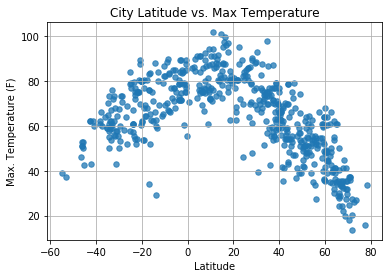

In [34]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

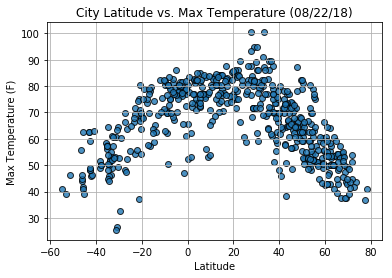

#### Latitude vs. Humidity Plot

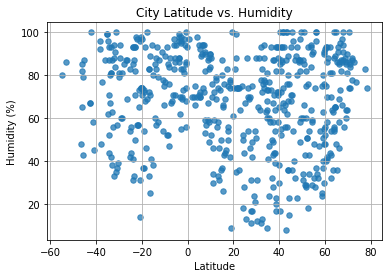

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

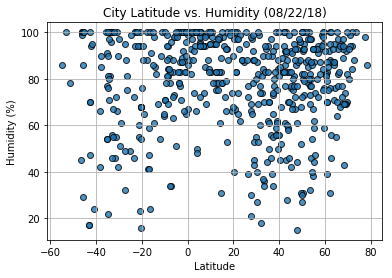

#### Latitude vs. Cloudiness Plot

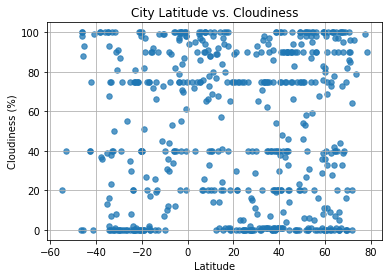

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

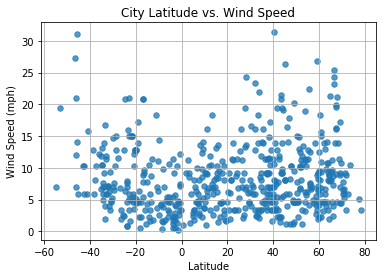

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()